<a href="https://colab.research.google.com/github/kareemrb27/Lab2.1/blob/master/Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning

**Unsupervised Machine Learning** involves finding patterns in data without labeled outcomes. It identifies hidden structures, relationships, or clusters in data, commonly used for tasks like clustering (e.g., k-means) and dimensionality reduction.

## **Dimensionality Reduction**:
Dimensionality reduction techniques aim to reduce the number of features in a dataset while retaining as much important information as possible.

<center><img src="https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg" width=600/></center>

Two key methods are:

1. **Principal Component Analysis (PCA)**:
   - Transforms data into new, uncorrelated variables called **principal components**.
   - The first few components capture the most variance, simplifying the dataset while preserving essential patterns.

2. **Singular Value Decomposition (SVD)**:
   - Decomposes a matrix into three matrices: $U$, $\Sigma$, and $V^T$

   - Helps identify important features by capturing the most significant relationships in the data, reducing noise.

## **Applications**:
- **Data compression** (e.g., image compression).
- **Feature extraction** for improved model performance.
- **Visualization** of high-dimensional data in lower dimensions.
- **Recommender Systems** for reducing the dimensions of the data

Both PCA and SVD focus on simplifying data, making it easier to interpret and process without losing key information.


## Section 1: Principal Component Analysis (PCA)

Let's implement PCA and reduce the dimensions of the data.
**Dataset used:** Socio Economic Data - [Link](https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv)

### Step 1: Loading the data

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For inline visualization of the data
%matplotlib inline

In [ ]:
# Load the data from the link
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")
# View the data
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Step 2: Understanding the data

In [ ]:
# Get the data description
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Interpretation:


1. **Child Mortality**: Wide range (2.6 to 208), indicating significant disparities in child mortality rates across countries.
2. **Exports and Imports**: Both have large variations, with exports ranging from 0.109 to 174 and imports from 0.066 to 125, showing economic diversity.
3. **Income**: High standard deviation (19,278), showing a large disparity in income levels, ranging from 609 to 125,000.
4. **Inflation**: Has negative values (minimum of -4.21), indicating deflation in some countries.
5. **GDP per Capita (gdpp)**: Large range (231 to 105,000) with a high mean of 12,964, reflecting economic differences across countries.

In [ ]:
# Checking the percentage of missing values
round(100 * (country_data.isnull().sum() / len(country_data.index)), 2)

,0
country,0.0
child_mort,0.0
exports,0.0
health,0.0
imports,0.0
income,0.0
inflation,0.0
life_expec,0.0
total_fer,0.0
gdpp,0.0


### Interpretation:
There are no null values in the dataset.

<Axes: xlabel='gdpp'>

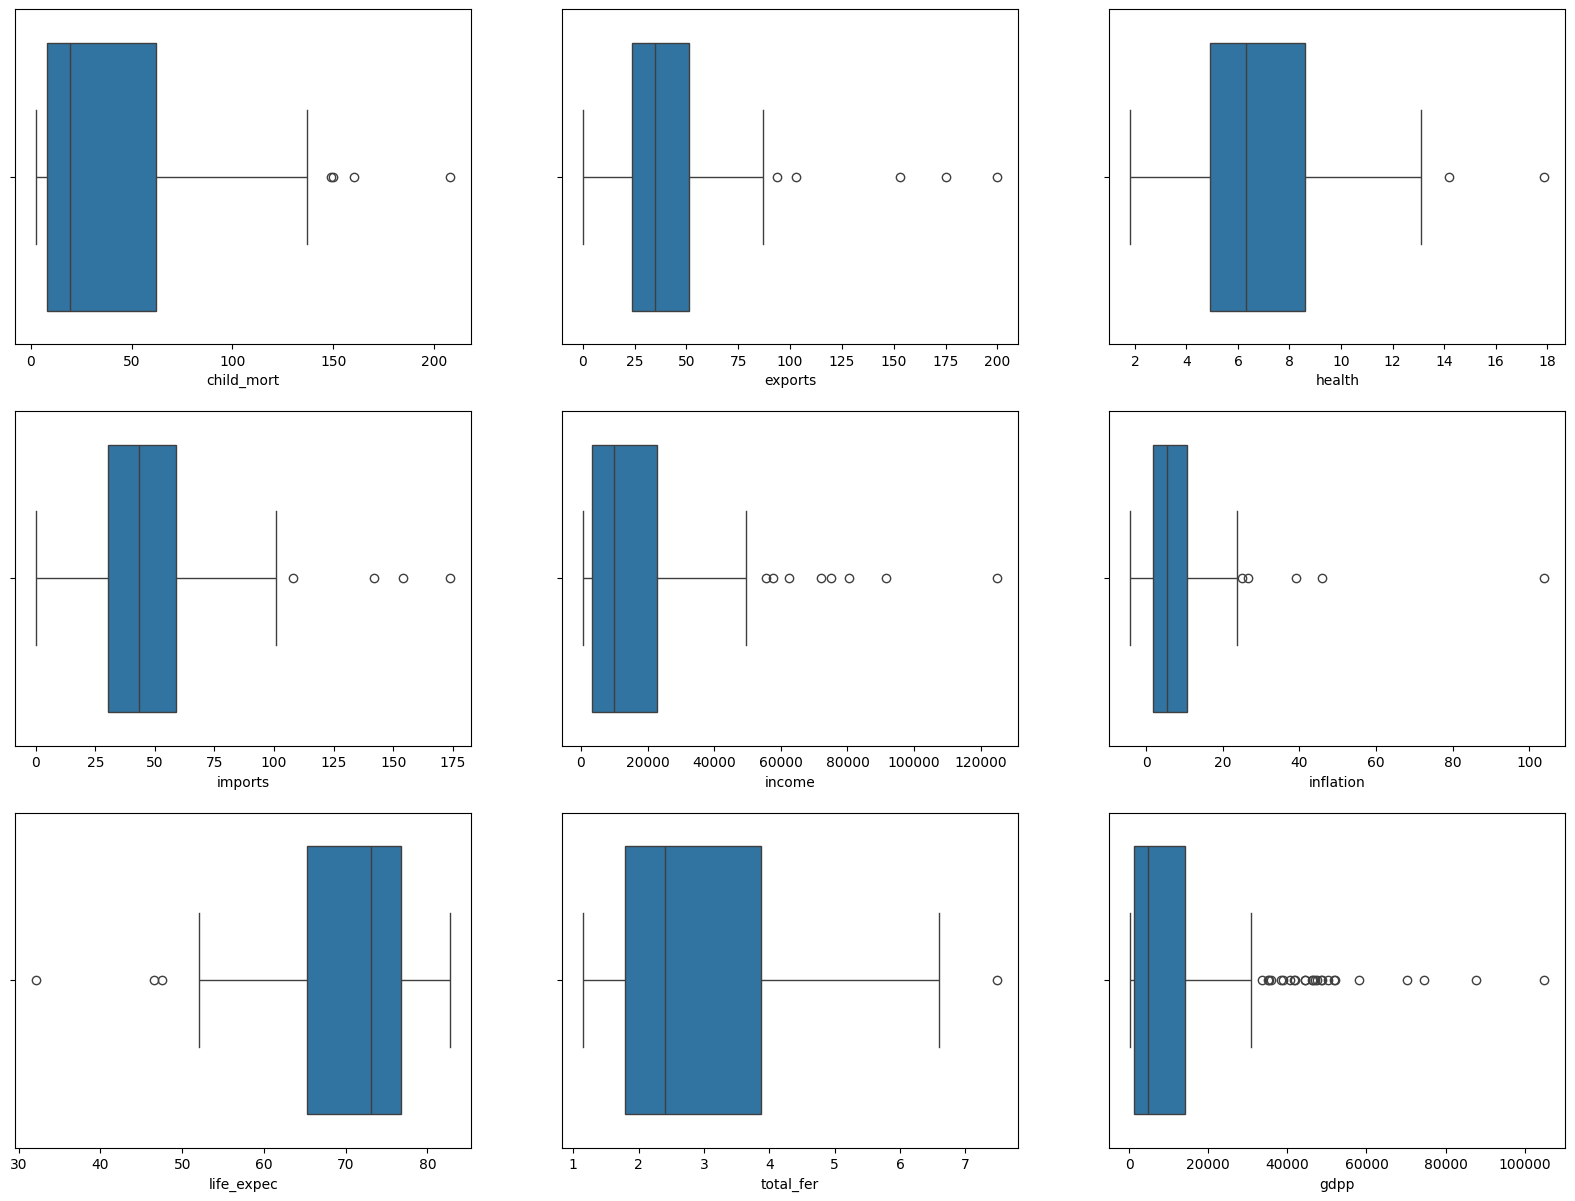

In [ ]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=100)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

### Interpretation:


1. **Child Mortality (child_mort)**: Shows several outliers, with a large range and skewed distribution indicating high variation in child mortality across countries.
   
2. **Exports & Imports**: Both have multiple outliers and wide ranges, suggesting economic differences in trade activities across countries.

3. **Income & GDP per Capita (gdpp)**: Both show significant outliers on the higher end, indicating a few countries with extremely high incomes and GDPs compared to others.

4. **Inflation**: Many outliers indicate that while most countries have moderate inflation, some experience extreme inflation or deflation.

5. **Life Expectancy (life_expec)**: A fairly compact distribution with fewer outliers, suggesting more uniformity in life expectancy across countries.

6. **Fertility Rate (total_fer)**: Fairly consistent distribution, with some outliers indicating countries with higher-than-average fertility rates.

These boxplots highlight significant economic and health disparities between countries.

In [ ]:
# Drop the target column
data = country_data.drop(columns=['gdpp'])

# Select only the numeric columns for PCA
features = data.select_dtypes(include=[np.number])

# View the features
features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13


### Step 3: Step by Step Implementation of PCA
- Step 3.1: Standardize the data
- Step 3.2: Compute the covariance matrix
- Step 3.3: Compute eigenvalues and eigenvectors
- Step 3.4: Sort Eigenvalues and Select Principal Components
- Step 3.5: Calculate the Explained Variance Ratio
- Step 3.6: Calculate Cumulative Explained Variance

#### Step 3.1: Standardize the data
Standardization ensures all features contribute equally to PCA, since it relies on variance.

In [ ]:
# Import the scaler
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the scaled data
features_scaled[:5]


array([[ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
         0.15733622, -1.61909203,  1.90288227],
       [-0.5389489 , -0.47965843, -0.09701618,  0.07083669, -0.3753689 ,
        -0.31234747,  0.64786643, -0.85997281],
       [-0.27283273, -0.09912164, -0.96607302, -0.64176233, -0.22084447,
         0.78927429,  0.67042323, -0.0384044 ],
       [ 2.00780766,  0.77538117, -1.44807093, -0.16531531, -0.58504345,
         1.38705353, -1.17923442,  2.12815103],
       [-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
        -0.60174853,  0.70425843, -0.54194633]])

#### Step 3.2: Compute the Covariance Matrix:
Calculate the covariance matrix to understand how the variables relate to each other.

In [ ]:
# Compute the covariance matrix
covariance_matrix = np.cov(features_scaled.T)

# View the covariance matrix
covariance_matrix

array([[ 1.0060241 , -0.32000945, -0.2016093 , -0.12797725, -0.52747354,
         0.29001277, -0.89201752,  0.85358942],
       [-0.32000945,  1.0060241 , -0.11509761,  0.74182289,  0.51989676,
        -0.10794074,  0.3182181 , -0.32193832],
       [-0.2016093 , -0.11509761,  1.0060241 ,  0.09629328,  0.1303592 ,
        -0.2569142 ,  0.21196135, -0.19785877],
       [-0.12797725,  0.74182289,  0.09629328,  1.0060241 ,  0.12314364,
        -0.2484822 ,  0.05471819, -0.16000656],
       [-0.52747354,  0.51989676,  0.1303592 ,  0.12314364,  1.0060241 ,
        -0.14864609,  0.61564899, -0.50486319],
       [ 0.29001277, -0.10794074, -0.2569142 , -0.2484822 , -0.14864609,
         1.0060241 , -0.24114897,  0.31883023],
       [-0.89201752,  0.3182181 ,  0.21196135,  0.05471819,  0.61564899,
        -0.24114897,  1.0060241 , -0.76545827],
       [ 0.85358942, -0.32193832, -0.19785877, -0.16000656, -0.50486319,
         0.31883023, -0.76545827,  1.0060241 ]])

#### Step 3.3: Compute Eigenvalues and Eigenvectors:
Find the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Compute the eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigen values:\n",eigenvalues)
print("Eigen vectors:\n",eigenvectors)

Eigen values:
 [3.59615705 1.55324696 1.17038164 0.74324181 0.56558787 0.22483356
 0.08555385 0.10919005]
Eigen vectors:
 [[-0.47287988  0.21412406 -0.09998804 -0.11518655  0.29716975  0.2033208
   0.74790361  0.13513304]
 [ 0.30839609  0.60837422  0.14603735 -0.10150821  0.05751086 -0.05344747
  -0.10944768  0.69641863]
 [ 0.14456816 -0.24160817 -0.64740271 -0.68015594 -0.05895877  0.01392064
  -0.04408935  0.18267289]
 [ 0.19464001  0.66113128 -0.28525732 -0.05636071 -0.31536808 -0.03654309
   0.12506224 -0.56924463]
 [ 0.38678706  0.03120652  0.24777586 -0.31502867  0.72825615  0.17896303
  -0.05430276 -0.35135794]
 [-0.22047498  0.00577075  0.6157768  -0.62129198 -0.41786462  0.06357684
   0.0098996  -0.0861501 ]
 [ 0.46419134 -0.23734341  0.15808191 -0.00385699 -0.09136627 -0.60043527
   0.5778456   0.02034424]
 [-0.45695156  0.17670197 -0.05108475 -0.15930427  0.30353554 -0.74678145
  -0.27225841 -0.08968381]]


#### Step 3.4: Sort Eigenvalues and Select Principal Components:
Sort the eigenvalues in descending order and select the top `k` eigenvectors corresponding to the largest eigenvalues.

In [ ]:
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_index]
eigenvectors_sorted

array([[-0.47287988,  0.21412406, -0.09998804, -0.11518655,  0.29716975,
         0.2033208 ,  0.13513304,  0.74790361],
       [ 0.30839609,  0.60837422,  0.14603735, -0.10150821,  0.05751086,
        -0.05344747,  0.69641863, -0.10944768],
       [ 0.14456816, -0.24160817, -0.64740271, -0.68015594, -0.05895877,
         0.01392064,  0.18267289, -0.04408935],
       [ 0.19464001,  0.66113128, -0.28525732, -0.05636071, -0.31536808,
        -0.03654309, -0.56924463,  0.12506224],
       [ 0.38678706,  0.03120652,  0.24777586, -0.31502867,  0.72825615,
         0.17896303, -0.35135794, -0.05430276],
       [-0.22047498,  0.00577075,  0.6157768 , -0.62129198, -0.41786462,
         0.06357684, -0.0861501 ,  0.0098996 ],
       [ 0.46419134, -0.23734341,  0.15808191, -0.00385699, -0.09136627,
        -0.60043527,  0.02034424,  0.5778456 ],
       [-0.45695156,  0.17670197, -0.05108475, -0.15930427,  0.30353554,
        -0.74678145, -0.08968381, -0.27225841]])

#### Step 3.5: Calculate the Explained Variance Ratio
Let's calculate the explained variance ratio for each principal component.

In [ ]:
# Calculate total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Calculate explained variance ratio for the first 10 components
explained_variance_ratio = eigenvalues / total_variance

# Print explained variance ratio for each component
print("Explained variance ratio : ", explained_variance_ratio)


Explained variance ratio :  [0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01063019 0.01356703]


#### Step 3.6: Calculate Cumulative Explained Variance
Let's understand how much cumulative variance is explained by the principal components.

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
print("Cumulative explained variance: ", cumulative_explained_variance)


Cumulative explained variance:  [0.4468279  0.63982116 0.78524283 0.87759173 0.94786687 0.97580278
 0.98643297 1.        ]


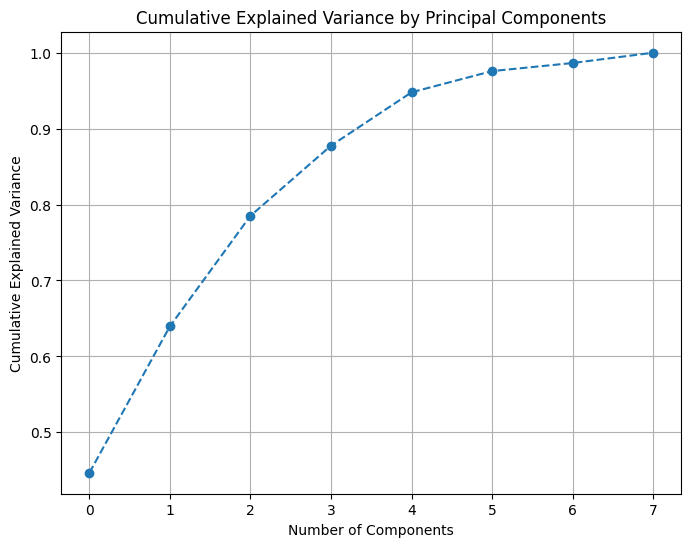

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Interpretation:

- The **cumulative explained variance** reaches nearly **100%** by the **7th principal component**.
- The first few components (e.g., 3-5) explain most of the variance (~90%), meaning the majority of information in the dataset can be captured with fewer components.
- After the 5th component, the additional components contribute very little to the overall variance, suggesting diminishing returns for adding more components.

This indicates that dimensionality can be effectively reduced while preserving most of the data's information.

### Alternate Way of using PCA:
Here’s how to perform PCA using sklearn directly, which simplifies the process and includes built-in methods to calculate explained variance and visualize it.

In [ ]:
# Import the required library
from sklearn.decomposition import PCA

# Steps remain the same till scaling the features
# Aplly pCA on scaled data
# Apply PCA, specify the number of components or leave empty for full decomposition
pca = PCA(n_components=7)  # Adjust the number of components if needed
X_pca = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance for each component
print("Explained variance ratio by each component: ", explained_variance_ratio)

Explained variance ratio by each component:  [0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01356703]


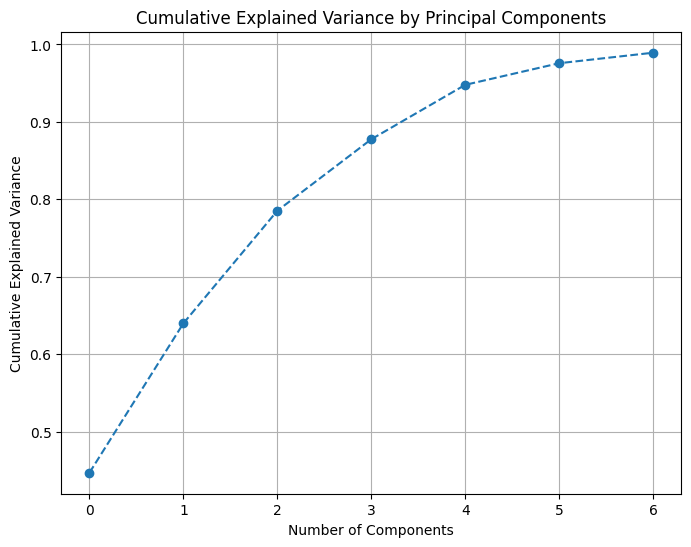

In [ ]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Interpretation:
Both gives the same result.

**Key Advantages of Using `sklearn`:**
- Simplified Calculation: No need to manually compute covariance matrices, eigenvalues, or eigenvectors. PCA is computed directly.
- Explained Variance: `explained_variance_ratio_` automatically gives the variance explained by each principal component.
- Visualization: A scree plot can easily show how many components are required to capture a desired amount of variance.



### What next after reducing the dimensions using PCA?

1. **Simplified Dataset**:
   - The data now has **fewer features** while preserving most of the **essential information** (variance).
  
2. **Training ML Models**:
   - Use the **reduced data** to **train machine learning models** faster since there are fewer features to process, resulting in lower computational cost.

3. **Avoiding Overfitting**:
   - **Lower dimensionality** helps in reducing the risk of **overfitting**, especially when working with limited data. The model focuses on **key features** rather than irrelevant details.

4. **Improved Performance**:
   - The reduced dataset often leads to **improved model performance**, especially when the original features were highly correlated or redundant, by focusing on the most informative components.

5. **Visualization**:
   - For exploratory analysis, reduced data (typically to 2 or 3 dimensions) can be **visualized** to understand patterns, clusters, or separations among classes.

6. **Feature Engineering**:
   - **Principal components** (new features after reduction) are used as **input features** for models, effectively acting as engineered features that capture important relationships in the data.

7. **Noise Reduction**:
   - PCA **removes noise** from the data by ignoring components with very low variance, which contributes to better model **robustness**.

8. **Compatibility with Algorithms**:
   - Reduced dimensions make data **more compatible** with ML algorithms that struggle with high-dimensional data, such as **distance-based models** (e.g., k-NN) or **linear models**.

 ### Do you remember?
 While working on the breast cancer data, we reduced the dimensions using PCA and then built the Naive Bayes and KNN Classification models to improve the results and performance!!!

 <hr>

## Section 2: Matrix Factorization: SVD - Singular Value Decomposition

Let's use the same socioeconomic data.
The intital process remains the same.
- Loading the data
- Selecting the features
- Scaling the data

In [ ]:
# Load the data from the link
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# Drop the target column
data = country_data.drop(columns=['gdpp'])

# Select only the numeric columns for SVD
features = data.select_dtypes(include=[np.number])

# Import the scaler
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Apply SVD manually

In [ ]:
# Import the library
from numpy.linalg import svd

# Perform Singular Value Decomposition
U, Sigma, Vt = svd(features_scaled)

# Check the shapes of the decomposed matrices
print("Shape of U: ", U.shape)
print("Shape of Sigma: ", Sigma.shape)
print("Shape of Vt: ", Vt.shape)

# Print the first few singular values (diagonal of Sigma matrix)
print("Singular Values: ", Sigma[:10])


Shape of U:  (167, 167)
Shape of Sigma:  (8,)
Shape of Vt:  (8, 8)
Singular Values:  [24.43280727 16.05736574 13.9385563  11.1075713   9.68956068  6.10920374
  4.25741089  3.76854593]


### Calculate Explained Variance Using SVD

In [ ]:
# Calculate the explained variance (similar to PCA's explained variance)
explained_variance = (Sigma**2) / np.sum(Sigma**2)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print the explained variance for the first few components
print("Explained variance by component: ", explained_variance[:10])

# Print cumulative explained variance
print("Cumulative explained variance: ", cumulative_explained_variance[:10])


Explained variance by component:  [0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01356703 0.01063019]
Cumulative explained variance:  [0.4468279  0.63982116 0.78524283 0.87759173 0.94786687 0.97580278
 0.98936981 1.        ]


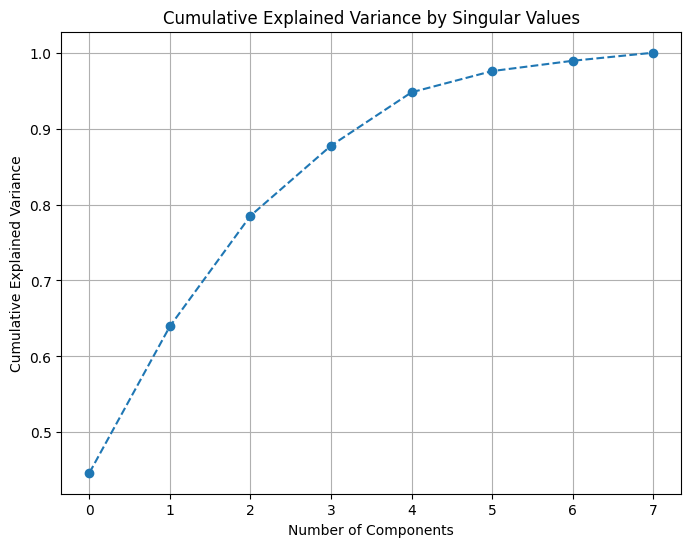

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Singular Values')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Apply SVD using `sklearn`

In [ ]:
# Import the library
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD (specify the number of components to retain)
svd = TruncatedSVD(n_components=7)  # Choose number of components
X_svd = svd.fit_transform(features_scaled)

# Get the explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained variance ratio: ", explained_variance_ratio)


Explained variance ratio:  [0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01356703]


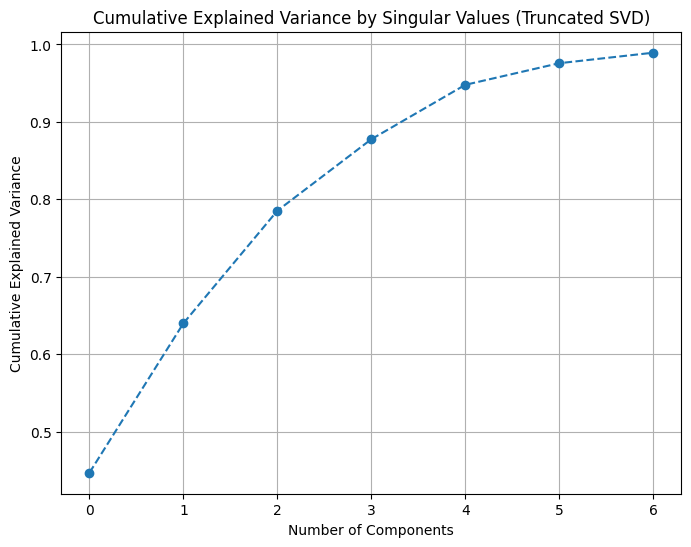

In [ ]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Singular Values (Truncated SVD)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Interpretation:
**Key Differences Between SVD and Truncated SVD:**
- Manual SVD using `np.linalg.svd` decomposes the entire matrix, which might be computationally expensive for large datasets.
- `Truncated SVD (sklearn)` is more efficient for dimensionality reduction, especially when you only need a few principal components, and works well with sparse data.
- Both approaches give you a way to reduce dimensions and explain the variance, with sklearn offering a more optimized and user-friendly method.
<hr>

## Section 3: Recommender System: An application of SVD
A recommender system is a tool that helps users discover relevant items—such as movies, products, or content—by predicting their preferences based on past behavior or the behavior of similar users. It leverages various techniques, including collaborative filtering (based on user-item interactions), content-based filtering (based on item features), or hybrid approaches combining both. The system analyzes patterns in data, like user ratings or purchase history, to suggest personalized recommendations. Recommender systems are widely used in platforms like Netflix, Amazon, and YouTube to enhance user experience by providing tailored suggestions.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT1p77Xk2Y3d5jeR-q934_-osDHX1DcQNQ5pw&s"/></center>

### Overview of Cosine Similarity:
**Cosine similarity** measures the **angle** between two vectors, which in this case represent two movies. It captures how similar two items are based on their direction in multi-dimensional space, regardless of their magnitude. The value ranges from:
- **1** (perfect similarity, same direction)
- **0** (no similarity, orthogonal)
- **-1** (completely opposite direction)

<center><img src="https://kdb.ai/files/2024/01/similarity-768x348.png" width=500/></center>

### Importance in the Recommender System:
In this movie recommender system, **cosine similarity** is used to compare the **rating patterns** of movies by users:
- If two movies are rated similarly by the same users, their vectors will have a **high cosine similarity** (close to 1).
- Movies with high similarity scores are considered similar in terms of user preferences, and therefore can be recommended together.

### Why Cosine Similarity?
- **Scale-independent**: It ignores magnitude, so differences in rating scales across users don’t affect the results.
- **Efficiency**: It's computationally efficient and works well in high-dimensional spaces, making it ideal for recommending similar movies based on user ratings.

In short, cosine similarity helps identify movies that share similar user ratings, making it a key tool for recommending movies users are likely to enjoy based on their viewing history.


### Step 1: Import the required libraries

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
pd.set_option('display.max_columns', None)

### Step 2: Load the dataset

In [ ]:
# Load the datasets
ratings = pd.read_csv('ratings_small.csv')
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

# View the data
ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# View the data
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Step 3: Merge the datasets
We have to merge these datasets.
- The `movieID` of ratings data is the same as `id' of movies data. The name has to be consistent for merging.
- Also, the dtypes have to be consistent before merging.

In [ ]:
# Rename the 'id' column to 'movieID' for consistency
movies = movies.rename(columns={'id': 'movieId'})

# Convert the 'movieId' in movies dataset to int64
movies['movieId'] = pd.to_numeric(movies['movieId'], errors='coerce')  # Convert to numeric, coercing errors

# Drop rows with NaN movieId values (which couldn't be converted)
movies = movies.dropna(subset=['movieId'])

# Ensure 'movieId' is now int64
movies['movieId'] = movies['movieId'].astype(int)
# Now perform the merge again after ensuring the types match
ratings = ratings.merge(movies, on='movieId', how='inner')

# Remove the suffix manually
ratings.columns = ratings.columns.str.replace('_x', '').str.replace('_y', '')

# Check the merged dataset
ratings.head()


,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,1371,2.5,1260759135,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",17000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0084602,en,Rocky III,"Now the world champion, Rocky Balboa is living...",11.673366,/ns55NGqTDEEjcI9z2a9htA2cFtG.jpg,"[{'name': 'United Artists', 'id': 60}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1982-05-28,270000000.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The greatest challenge.,Rocky III,False,6.6,894.0
1,1,1405,1.0,1260759203,False,NaN,546883,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,tt0015881,en,Greed,Greed is the classic 1924 silent film by Erich...,6.925081,/a5ksTkNrHR3o3hJiFgM2uMfYaRR.jpg,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1924-12-04,0.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Greed,False,7.5,25.0
2,1,2105,4.0,1260759139,False,"{'id': 2806, 'name': 'American Pie Collection'...",11000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0163651,en,American Pie,"At a high-school party, four friends find that...",18.344227,/k40WFAXMRekWEqsjURO3jiWob67.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1999-07-09,235483004.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's nothing like your first piece.,American Pie,False,6.4,2358.0
3,1,2193,2.0,1260759198,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.crownintlpictures.com/lntitles.html,tt0085980,en,My Tutor,High school senior Bobby Chrystal fails his Fr...,4.67546,/2b7rg7olnmtSBta2TV4rQdBZQXu.jpg,"[{'name': 'Crown International Pictures', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1983-03-04,22587000.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,School's out...But Bobby's education has just ...,My Tutor,False,5.8,17.0
4,1,2294,2.0,1260759108,False,NaN,22000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0261392,en,Jay and Silent Bob Strike Back,When Jay and Silent Bob learn that their comic...,11.619446,/8xI9g6su8aKwg3Nk5qUnS025NyA.jpg,"[{'name': 'Dimension Films', 'id': 7405}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-08-22,33788161.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hollywood had it coming,Jay and Silent Bob Strike Back,False,6.4,491.0


### Step 4: Create a user - movie matrix
Now, let's create a user-movie matrix - where rows are users and columns are movies, the values would be the ratings. This is done by creating a pivot table.

In [ ]:
# Create a user-movie matrix (rows are users, columns are movies, values are ratings)
user_movie_matrix = ratings.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Check the shape and a few rows of the user-item matrix
print(user_movie_matrix.shape)
user_movie_matrix.head()




(671, 2794)


title   !Women Art Revolution  'Gator Bait  'Twas the Night Before Christmas  \
userId                                                                         
1                         0.0          0.0                               0.0   
2                         0.0          0.0                               0.0   
3                         0.0          0.0                               0.0   
4                         0.0          0.0                               0.0   
5                         0.0          0.0                               0.0   

title   ...And God Created Woman  00 Schneider - Jagd auf Nihil Baxter  \
userId                                                                   
1                            0.0                                   0.0   
2                            0.0                                   0.0   
3                            0.0                                   0.0   
4                            0.0                                   0.0   
5                            0.0                                   0.0   

title   10 Items or Less  10 Things I Hate About You  10,000 BC  \
userId                                                            
1                    0.0                         0.0        0.0   
2                    0.0                         0.0        0.0   
3                    0.0                         0.0        0.0   
4                    0.0                         0.0        0.0   
5                    0.0                         0.0        0.0   

title   11'09''01 - September 11  12 Angry Men  13 Tzameti  1408  15 Minutes  \
userId                                                                         
1                            0.0           0.0         0.0   0.0         0.0   
2                            0.0           0.0         0.0   0.0         0.0   
3                            0.0           0.0         0.0   0.0         0.0   
4                            0.0           0.0         0.0   0.0         0.0   
5                            0.0           0.0         0.0   0.0         0.0   

title   16 Blocks  1900  1942: A Love Story  1984  2 Days in Paris  \
userId                                                               
1             0.0   0.0                 0.0   0.0              0.0   
2             0.0   0.0                 0.0   0.0              0.0   
3             0.0   0.0                 0.0   0.0              0.0   
4             0.0   0.0                 0.0   0.0              0.0   
5             0.0   0.0                 0.0   0.0              0.0   

title   20,000 Leagues Under the Sea  2001: A Space Odyssey  2010  2046  \
userId                                                                    
1                                0.0                    0.0   0.0   0.0   
2                                0.0                    3.0   0.0   0.0   
3                                0.0                    0.0   0.0   0.0   
4                                3.0                    0.0   0.0   0.0   
5                                0.0                    0.0   0.0   0.0   

title   2061 - Un anno eccezionale  21 Grams  24 Hour Party People  25th Hour  \
userId                                                                          
1                              0.0       0.0                   0.0        0.0   
2                              0.0       0.0                   0.0        0.0   
3                              0.0       0.0                   0.0        0.0   
4                              0.0       0.0                   0.0        0.0   
5                              0.0       0.0                   0.0        0.0   

title   28 Days Later  28 Weeks Later  29th Street  2:37  \
userId                                                     
1                 0.0             0.0          0.0   0.0   
2                 0.0             0.0          0.0   0.0   
3                 0.0             0.0          0.0   0.0   
4   

### Step 5: Apply SVD to the user-movie matrix
Let's apply SVD to the matrix and reduce the dimensions.

In [ ]:
# Apply SVD
svd = TruncatedSVD(n_components=50, random_state=42)  # You can choose the number of components
user_movie_svd = svd.fit_transform(user_movie_matrix)

# Check the shape of the transformed matrix
user_movie_svd.shape


(671, 50)

### Interpretation:
-After applying **Truncated SVD** to the user_movie_matrix (which originally had dimensions (num_users, num_movies)), the matrix is reduced to (num_users, 50).
- This means each user is now represented by a 50-dimensional vector, which captures the most significant features of their movie preferences while reducing the matrix's complexity.
- We had 671 users and originally 2794 movies, the shape of the original matrix would be (671, 2794).
- After applying SVD with 50 components, the transformed matrix would have a shape of (671, 50), meaning that each user is now represented by 50 values (instead of 2794), capturing the most important information about their movie preferences.

### Step 6: Transpose the user-movie matrix

After applying SVD, we obtain a matrix of shape (num_users,50), where each row represents a user's preferences in terms of the top 50 principal components (features).

Our goal is to calculate **similarity between movies**, not between users. In the original user-movie matrix, **movies are represented by the columns**. Therefore, we need to focus on these columns.

In the SVD-transformed matrix, the **rows represent users**, while the **columns represent the 50 principal components** that describe user preferences in a reduced-dimensional space.

To calculate **movie-to-movie similarity** (e.g., how similar Movie A is to Movie B based on user preferences), we need to work with the movies instead of users. This is where Vᵀ from the SVD decomposition comes into play.

- In the SVD decomposition of the original matrix, Vᵀ has a shape of (50,num_movies).
- By transposing Vᵀ, we obtain a matrix of shape (num_movies,50).

After transposing, each **row now represents a movie** in terms of the 50 principal components, allowing us to easily calculate **movie-to-movie similarity** using these vectors.



In [ ]:
# Transpose the SVD-transformed matrix to get (movies, components)
movie_svd_matrix = user_movie_svd.T  # Now it's (movies, components)

# Check the shape of the transposed matrix (movies, components)
print("Shape of the movie SVD matrix (movies, components): ", movie_svd_matrix.shape)


Shape of the movie SVD matrix (movies, components):  (50, 671)


### Interpretation:

- In this context, we are interested in the matrix Vᵀ, which represents the **principal components** for the movies.
  
  - **Shape of Vᵀ**: (50,num_movies)
    - Here, **each column** represents a movie in terms of the top 50 principal components (features).
  
  - **After Transposing Vᵀ:** To focus on the movies, we **transpose** Vᵀ, resulting in a new matrix, \( V \).
    
    - **Shape of \( V \)**: (num_movies,50)
      - In this transposed matrix, **each row** now represents a movie in the 50-dimensional reduced space.

**Similarity Calculation:**

- With \( V \) having shape (num_movies,50), each **row** represents a movie in the reduced-dimensional space.
- We can now compute **cosine similarity** between the rows (movies) to determine how similar they are based on the reduced set of features derived from user preferences.


### Step 7: Calculating cosine similarity
Let's compute cosine similarity between movies, which helps to find similar movies based on user preferences.

This process enables to build a movie recommender system that suggests similar movies based on how users rated them, even though the dimensionality of the data has been reduced through SVD.

In [ ]:
# Compute cosine similarity between movies
movie_similarity = cosine_similarity(user_movie_matrix.T)  # Transpose again to get (movies, movies)

# Check the shape of the movie similarity matrix
print("Shape of movie similarity matrix (movies, movies): ", movie_similarity.shape)


Shape of movie similarity matrix (movies, movies):  (2794, 2794)


In [ ]:
# Get movie titles from the user-movie matrix
movie_titles = user_movie_matrix.columns

# Create a DataFrame with movie similarity, using movie titles for rows and columns
movie_similarity_df = pd.DataFrame(movie_similarity, index=movie_titles, columns=movie_titles)

# Check the first few rows
movie_similarity_df.head()


title                                 !Women Art Revolution  'Gator Bait  \
title                                                                      
!Women Art Revolution                              1.000000          0.0   
'Gator Bait                                        0.000000          1.0   
'Twas the Night Before Christmas                   0.513704          0.0   
...And God Created Woman                           0.000000          0.0   
00 Schneider - Jagd auf Nihil Baxter               0.000000          0.0   

title                                 'Twas the Night Before Christmas  \
title                                                                    
!Women Art Revolution                                         0.513704   
'Gator Bait                                                   0.000000   
'Twas the Night Before Christmas                              1.000000   
...And God Created Woman                                      0.000000   
00 Schneider - Jagd auf Nihil Baxter                          0.000000   

title                                 ...And God Created Woman  \
title                                                            
!Women Art Revolution                                 0.000000   
'Gator Bait                                           0.000000   
'Twas the Night Before Christmas                      0.000000   
...And God Created Woman                              1.000000   
00 Schneider - Jagd auf Nihil Baxter                  0.789352   

title                                 00 Schneider - Jagd auf Nihil Baxter  \
title                                                                        
!Women Art Revolution                                             0.000000   
'Gator Bait                                                       0.000000   
'Twas the Night Before Christmas                                  0.000000   
...And God Created Woman                                          0.789352   
00 Schneider - Jagd auf Nihil Baxter                              1.000000   

title                                 10 Items or Less  \
title                                                    
!Women Art Revolution                         0.000000   
'Gator Bait                                   0.207390   
'Twas the Night Before Christmas              0.000000   
...And God Created Woman                      0.345651   
00 Schneider - Jagd auf Nihil Baxter          0.272840   

title                                 10 Things I Hate About You  10,000 BC  \
title                                                                         
!Women Art Revolution                                        0.0        0.0   
'Gator Bait                                                  0.0        0.0   
'Twas the Night Before Christmas                             0.0        0.0   
...And God Created Woman                                     0.0        0.0   
00 Schneider - Jagd auf Nihil Baxter                         0.0        0.0   

title                                 11'09''01 - September 11  12 Angry Men  \
title                                                                          
!Women Art Revolution                                      0.0           0.0   
'Gator Bait                                                0.0           0.0   
'Twas the Night Before Christmas                           0.0           0.0   
...And God Created Woman                                   0.0           0.0   
00 Schneider - Jagd auf Nihil Baxter                       0.0           0.0   

title                                 13 Tzameti  1408  15 Minutes  16 Blocks  \
title                                                                           
!Women Art Revolution                        0.0   0.0         0.0        0.0   
'Gator Bait                                  0.0   0.0         0.0        0.0   
'Twas the Night Before Christmas             0.0   0.0         0.0        0.0   
...And God 

### Step 7: Create a function that recommends similar movies

- Retrieve the top N movies most similar to the specified movie based on the cosine similarity scores.
- Sort the similarity scores in descending order and skip the input movie to recommend other movies.
- Output the recommended movies along with their similarity scores.

In [ ]:
# Function to recommend movies based on similarity
def recommend_movies(movie_title, similarity_matrix, num_recommendations=5):
    if movie_title not in similarity_matrix.columns:
        print(f"Movie '{movie_title}' not found.")
        return

    # Get similarity scores for the given movie
    similar_movies = similarity_matrix[movie_title].sort_values(ascending=False)[1:num_recommendations+1]

    # Print the recommended movies
    print(f"Movies similar to '{movie_title}':\n")
    for i, (movie, score) in enumerate(similar_movies.items(), 1):
        print(f"{i}. {movie} (Similarity: {score:.2f})")

# Example usage
recommend_movies('Solaris', movie_similarity_df)


Movies similar to 'Solaris':

1. Terminator 3: Rise of the Machines (Similarity: 0.70)
2. The Million Dollar Hotel (Similarity: 0.66)
3. Monsoon Wedding (Similarity: 0.63)
4. Sissi (Similarity: 0.62)
5. Once Were Warriors (Similarity: 0.58)


### Do you know?

What we implemented is an example of **collaborative filtering**.

### Why It's Collaborative Filtering:
- It is based on **user behavior** (specifically, movie ratings given by users) rather than the attributes or content of the movies themselves.
- The system uses **cosine similarity** to compare the rating patterns between movies, meaning that movies are considered similar if they are rated similarly by the same users.

In **collaborative filtering**, the focus is on learning from the interactions between users and items (in this case, movie ratings), rather than the intrinsic properties of the items (such as genre, cast, or director). This makes it different from **content-based filtering**, which would rely on the features or content of the movies themselves.

### Summary:
- **Collaborative Filtering**: Uses user ratings to find similar movies.
- **Content-Based Filtering**: Would use the attributes of movies (e.g., genre, director) to recommend similar movies.

<center><img src="https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png" width=500/></center>

The implementation here focuses on **collaborative filtering** because it finds similar movies based on **user ratings** rather than movie attributes.
<hr> <hr>


## Are You Wondering Why the Recommended Movies Are Not Very Similar?

If you're wondering why the movies recommended—such as *Monsoon Wedding*—don't seem to align well with the themes or genre of *Solaris*, here are the reasons:

### 1. Collaborative Filtering Challenges
- **Collaborative Filtering with SVD** was applied to the ratings dataset to identify patterns in user preferences. This technique relies heavily on **user behavior** to find similarities between items.
  
- If many users who rated *Solaris* also rated *Monsoon Wedding* highly, the **SVD model** considers them similar—**regardless of content differences**. Collaborative filtering aims to find **correlations in user ratings**, not to understand actual movie content.

- In this case, users who watched *Solaris* may have broad interests, which can lead to recommendations from **different genres**. Thus, movies like *The Million Dollar Hotel* or *Monsoon Wedding* may appear, even though their **themes and tone** differ significantly from *Solaris*.

- Additionally, the dataset used is a **reduced version**, which may affect the accuracy of the results.

### 2. Limitations of SVD
- **Linearity Assumption**: SVD assumes that the **latent factors** representing user preferences and item attributes are **linearly related**. However, user preferences are often **non-linear** in nature, and SVD may struggle to capture these complex patterns effectively. This can lead to **suboptimal recommendations**, especially for nuanced, multi-dimensional relationships that require non-linear modeling.

- **Loss of Unique Characteristics**: By reducing the dimensionality, **SVD** compresses the original data into a smaller number of components, which can lead to the **loss of specific characteristics** that make items unique. For a movie like *Solaris*, this may mean losing important aspects related to its philosophical and psychological depth, resulting in **less personalized recommendations**.

### 3. General Drawbacks
- **Cold Start Problem**: SVD is not effective at handling **new users or items** that do not have sufficient historical data. For new movies without ratings, SVD struggles to make meaningful recommendations.

- **Handling Sparsity**: The user-item matrix used for SVD is often **sparse**, with many users having rated only a few movies. **SVD requires a fully filled matrix**, which means that missing values need to be imputed before decomposition. This imputation can lead to **distorted relationships**, ultimately affecting recommendation quality.


Despite these drawbacks, **SVD remains popular** for collaborative filtering because it effectively reduces the dimensionality of complex user-item matrices and captures underlying patterns in user behavior. However, in practice, alternatives like **matrix factorization with stochastic gradient descent (SGD)** or **non-linear models** might be better suited for large-scale or non-linear recommendation scenarios.

*Note: This demo aims to showcase the efficacy of SVD for dimensionality reduction and its application in recommendation systems, not necessarily the performance of the recommendations themselves.*

<hr> <hr>